In [1]:
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/Human_body_weight'

In [3]:
response = requests.get(url, headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36'})

In [4]:
response

<Response [200]>

In [5]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Human body weight - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled ve

In [6]:
from bs4 import BeautifulSoup

In [7]:
# convert string into html code which is searchable.

soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Human body weight - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector

In [12]:
l = soup.find_all('table' ,{'class' : 'wikitable'})

In [14]:
 str(l[0])

'<table class="wikitable sortable">\n<tbody><tr>\n<th>Region\n</th>\n<th>Adult <br/> population<br/>(millions)\n</th>\n<th>Average weight\n</th>\n<th>% <br/> Overweight\n</th>\n<th><style data-mw-deduplicate="TemplateStyles:r1038841319">.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}</style><span class="rt-commentedText tooltip tooltip-dotted" title="Reference">Ref</span>\n</th></tr>\n<tr>\n<td><a href="/wiki/Africa" title="Africa">Africa</a></td>\n<td>535</td>\n<td>60.7\xa0kg (133.8\xa0lb)</td>\n<td>28.9%</td>\n<td><sup class="reference" id="cite_ref-biomed_11-0"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</span></a></sup>\n</td></tr>\n<tr>\n<td><a href="/wiki/Asia" title="Asia">Asia</a></td>\n<td>2,815</td>\n<td>57.7\xa0kg (127.2\xa0lb)</td>\n<td>24.2%</td>\n<td><sup class="reference" id="cite_ref-biomed_11-1"><a href="#cite_note-biomed-11"><span class="cite-bracket">[</span>11<span class="cite-bracket">]</s

In [16]:
# convert html code into a pandas data frame
import pandas as pd


In [17]:
a = pd.read_html(str(l[0]))

/tmp/ipython-input-3348648589.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  a = pd.read_html(str(l[0]))


In [18]:
a

[                            Region  Adult population (millions)  \
 0                           Africa                          535   
 1                             Asia                         2815   
 2                           Europe                          606   
 3  Latin America and the Caribbean                          386   
 4                    North America                          263   
 5                          Oceania                           24   
 6                            World                         4630   
 
        Average weight % Overweight   Ref  
 0  60.7 kg (133.8 lb)        28.9%  [11]  
 1  57.7 kg (127.2 lb)        24.2%  [11]  
 2  70.8 kg (156.1 lb)        55.6%  [11]  
 3  67.9 kg (149.7 lb)        57.9%  [11]  
 4  80.7 kg (177.9 lb)        73.9%  [11]  
 5  74.1 kg (163.4 lb)        63.3%  [11]  
 6  62.0 kg (136.7 lb)        34.7%  [11]  ]

In [19]:
df = a[0]

In [20]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,Ref
0,Africa,535,60.7 kg (133.8 lb),28.9%,[11]
1,Asia,2815,57.7 kg (127.2 lb),24.2%,[11]
2,Europe,606,70.8 kg (156.1 lb),55.6%,[11]
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,[11]
4,North America,263,80.7 kg (177.9 lb),73.9%,[11]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Region                       7 non-null      object
 1   Adult population (millions)  7 non-null      int64 
 2   Average weight               7 non-null      object
 3   % Overweight                 7 non-null      object
 4   Ref                          7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes


In [22]:
df.drop(columns = 'Ref', inplace = True)

In [24]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight
0,Africa,535,60.7 kg (133.8 lb),28.9%
1,Asia,2815,57.7 kg (127.2 lb),24.2%
2,Europe,606,70.8 kg (156.1 lb),55.6%
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%
4,North America,263,80.7 kg (177.9 lb),73.9%


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Region                       7 non-null      object
 1   Adult population (millions)  7 non-null      int64 
 2   Average weight               7 non-null      object
 3   % Overweight                 7 non-null      object
dtypes: int64(1), object(3)
memory usage: 356.0+ bytes


In [26]:
df['Average weight']

,Average weight
0,60.7 kg (133.8 lb)
1,57.7 kg (127.2 lb)
2,70.8 kg (156.1 lb)
3,67.9 kg (149.7 lb)
4,80.7 kg (177.9 lb)
5,74.1 kg (163.4 lb)
6,62.0 kg (136.7 lb)


In [27]:
a = '60.7 kg (133.8 lb)'

In [39]:
a.split("(")[1]

'133.8 lb)'

In [30]:
import re

In [40]:
float(re.findall(r"\d+\.\d+",a.split("(")[1] )[0])

133.8

In [45]:
df['Average weight (kg)'] = df['Average weight'].apply(lambda x : float(re.findall(r"\d+\.\d+",x.split("(")[0] )[0]))

In [46]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,Average weight (kg),Average weight (lbs)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7,133.8
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7,127.2
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8,156.1
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9,149.7
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7,177.9


In [43]:
df['Average weight (lbs)'] = df['Average weight'].apply(lambda x : float(re.findall(r"\d+\.\d+",x.split("(")[1] )[0]))

In [47]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,Average weight (kg),Average weight (lbs)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7,133.8
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7,127.2
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8,156.1
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9,149.7
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7,177.9


In [49]:
df.drop(columns = 'Average weight', inplace = True)

In [50]:
df.head()

,Region,Adult population (millions),% Overweight,Average weight (kg),Average weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [51]:
df.columns

Index(['Region', 'Adult population (millions)', '% Overweight',
       'Average weight (kg)', 'Average weight (lbs)'],
      dtype='object')

In [52]:
df.rename(columns ={'% Overweight' : 'Overweight(%)'}, inplace = True)

In [53]:
df.head()

,Region,Adult population (millions),Overweight(%),Average weight (kg),Average weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [54]:
df.rename(columns ={'Adult population (millions)' : 'Adult population (M)'}, inplace = True)

In [55]:
df.head()

,Region,Adult population (M),Overweight(%),Average weight (kg),Average weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [56]:
df['Overweight(%)']

,Overweight(%)
0,28.9%
1,24.2%
2,55.6%
3,57.9%
4,73.9%
5,63.3%
6,34.7%


In [57]:
a = '28.9%'

In [59]:
float(re.findall(r"\d+\.\d+",a)[0])

28.9

In [62]:
df['Overweight(%)'] = df['Overweight(%)'].apply(lambda x:float(re.findall(r"\d+\.\d+",x)[0]))

In [63]:
df

,Region,Adult population (M),Overweight(%),Average weight (kg),Average weight (lbs)
0,Africa,535,28.9,60.7,133.8
1,Asia,2815,24.2,57.7,127.2
2,Europe,606,55.6,70.8,156.1
3,Latin America and the Caribbean,386,57.9,67.9,149.7
4,North America,263,73.9,80.7,177.9
5,Oceania,24,63.3,74.1,163.4
6,World,4630,34.7,62.0,136.7


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Latin America and the Caribbean'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'World')])

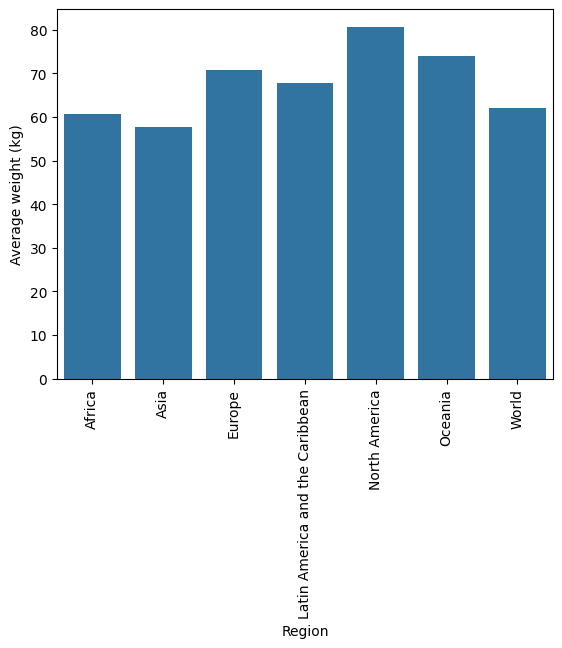

In [74]:
sns.barplot(x = df['Region'], y = df['Average weight (kg)'])
plt.xticks(rotation =90)